## CS5062 - Lab 2
#### Student Name:Zhen Wang
#### Studeng Id: 19327444

## Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# load data
df = pd.read_csv("./bank.csv")
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [3]:
# check missing values
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [4]:
# copy original data
df_original = df

## Encode the Categorical Features

In [5]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
# Create a mapper for 'month'
scale_mapper = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12,
}

df['month'] = df['month'].replace(scale_mapper)
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day  month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16      9       327         2     -1         0      NaN   
1996   cellular   16      9      1334         2     -1         0      NaN   
1997  telephone   17      9       231         1     -1         0      NaN   
1998        NaN   20      9       185         1     -1         0      NaN   
1999   cellular   22      9       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

using a mapper method to replace `month` value to number 

In [ ]:
# one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job', 'contact'], 
                        dummy_na=True, 
                        drop_first=False)

df = pd.get_dummies(df, columns=['education', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

age  marital default  balance housing loan  day  month  duration  \
1995  20.0   single      no     2785      no   no   16      9       327   
1996  28.0   single      no      127      no   no   16      9      1334   
1997  81.0  married      no     1154      no   no   17      9       231   
1998  46.0  married      no     4343     yes   no   20      9       185   
1999  40.0  married      no     6403      no   no   22      9       208   

      campaign  ...  job_nan  contact_cellular contact_telephone  contact_nan  \
1995         2  ...        0                 1                 0            0   
1996         2  ...        0                 1                 0            0   
1997         1  ...        0                 0                 1            0   
1998         1  ...        0                 0                 0            1   
1999         2  ...        0                 1                 0            0   

      education_secondary  education_tertiary  education_nan  poutcome_other  \
1995                    0                   0              1               0   
1996                    1                   0              0               0   
1997                    0                   0              0               0   
1998                    0                   0              0               0   
1999                    1                   0              0               0   

      poutcome_success  poutcome_nan  
1995                 0             1  
1996                 0             1  
1997                 0             1  
1998                 0             1  
1999                 0             1  

[5 rows x 34 columns]

One-hot encode the categorical columns with NaNs, drop first for `education` and `poutcome` as the values are highly correlation. 

In [8]:
# one-hot encode all other categorical columns
df = pd.get_dummies(df, drop_first=False)
df.head()

age  balance  day  month  duration  campaign  pdays  previous  job_admin.  \
0  32.0      392    1      4       957         2    131         2           0   
1  39.0      688    1      4       233         2    133         1           0   
2  59.0     1035    1      4       126         2    239         1           0   
3  47.0      398    1      4       274         1    238         2           0   
4  54.0     1004    1      4       479         1    307         1           0   

   job_blue-collar  ...  marital_married  marital_single  default_no  \
0                0  ...                0               1           1   
1                0  ...                0               0           1   
2                0  ...                1               0           1   
3                1  ...                1               0           1   
4                0  ...                1               0           1   

   default_yes  housing_no  housing_yes  loan_no  loan_yes  subscribed_no  \
0            0           0            1        1         0              1   
1            0           0            1        0         1              1   
2            0           0            1        0         1              1   
3            0           0            1        0         1              1   
4            0           0            1        1         0              1   

   subscribed_yes  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 40 columns]

In [9]:
# encoding cyclical feature
def encode_cyclical(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [10]:
df = encode_cyclical(df, 'month', max(df['month']))
df = encode_cyclical(df, 'day', max(df['day']))
df.head()

age  balance  day  month  duration  campaign  pdays  previous  job_admin.  \
0  32.0      392    1      4       957         2    131         2           0   
1  39.0      688    1      4       233         2    133         1           0   
2  59.0     1035    1      4       126         2    239         1           0   
3  47.0      398    1      4       274         1    238         2           0   
4  54.0     1004    1      4       479         1    307         1           0   

   job_blue-collar  ...  housing_no  housing_yes  loan_no  loan_yes  \
0                0  ...           0            1        1         0   
1                0  ...           0            1        0         1   
2                0  ...           0            1        0         1   
3                1  ...           0            1        0         1   
4                0  ...           0            1        1         0   

   subscribed_no  subscribed_yes  month_sin  month_cos   day_sin  day_cos  
0              1               0   0.866025       -0.5  0.201299  0.97953  
1              1               0   0.866025       -0.5  0.201299  0.97953  
2              1               0   0.866025       -0.5  0.201299  0.97953  
3              1               0   0.866025       -0.5  0.201299  0.97953  
4              1               0   0.866025       -0.5  0.201299  0.97953  

[5 rows x 44 columns]

Encoding cyclical column `day` and `month` thus the ML model would know that a feature is cyclical

## Treatment of Missing Values in Numerical Columns

In [11]:
# check number of missing values 
df.isna().sum()

age                    12
balance                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
job_admin.              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
contact_cellular        0
contact_telephone       0
contact_nan             0
education_secondary     0
education_tertiary      0
education_nan           0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
marital_divorced        0
marital_married         0
marital_single          0
default_no              0
default_yes             0
housing_no              0
housing_yes             0
loan_no                 0
loan_yes                0
subscribed_n

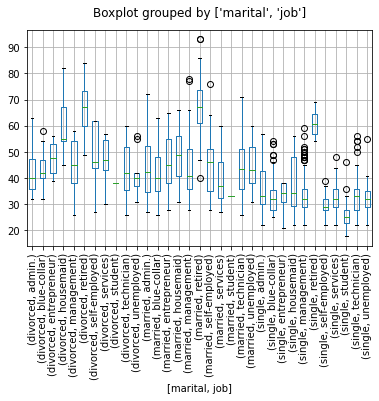

In [12]:
df_original.boxplot(column='age', by=['marital','job'], rot=90)
plt.title("")
plt.show()

In [13]:
ptable = df_original.pivot_table(values ='age',
                                 index='job',
                                 columns='marital',
                        aggfunc=np.mean)
ptable

marital         divorced    married     single
job                                           
admin.         42.781250  43.593750  36.220930
blue-collar    43.272727  42.130208  33.325301
entrepreneur   47.500000  45.909091  32.875000
housemaid      60.600000  48.600000  38.100000
management     45.000000  43.536885  33.830303
retired        67.210526  67.201681  61.000000
self-employed  48.200000  44.485714  29.571429
services       46.631579  39.595745  32.392157
student        38.000000  33.000000  25.462366
technician     43.225806  43.885000  33.318966
unemployed     41.444444  45.032258  32.758621

In [14]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['job'], x['marital']]

# Replace missing values
df['age'].fillna(df_original[df_original['age'].isnull()].apply(get_element, axis=1), inplace=True)
df.head()

age  balance  day  month  duration  campaign  pdays  previous  job_admin.  \
0  32.0      392    1      4       957         2    131         2           0   
1  39.0      688    1      4       233         2    133         1           0   
2  59.0     1035    1      4       126         2    239         1           0   
3  47.0      398    1      4       274         1    238         2           0   
4  54.0     1004    1      4       479         1    307         1           0   

   job_blue-collar  ...  housing_no  housing_yes  loan_no  loan_yes  \
0                0  ...           0            1        1         0   
1                0  ...           0            1        0         1   
2                0  ...           0            1        0         1   
3                1  ...           0            1        0         1   
4                0  ...           0            1        1         0   

   subscribed_no  subscribed_yes  month_sin  month_cos   day_sin  day_cos  
0              1               0   0.866025       -0.5  0.201299  0.97953  
1              1               0   0.866025       -0.5  0.201299  0.97953  
2              1               0   0.866025       -0.5  0.201299  0.97953  
3              1               0   0.866025       -0.5  0.201299  0.97953  
4              1               0   0.866025       -0.5  0.201299  0.97953  

[5 rows x 44 columns]

Group by `marital` and `job` to get median `age` and fill into missing row

## Rescaling Features

In [15]:
# using standard scaler
standard_scaler = StandardScaler()
df[['age', 'balance', 'day', 'month', 'duration', 'pdays']] = standard_scaler.fit_transform(df[['age', 'balance', 'day', 'month', 'duration', 'pdays']])
df.head()

age   balance       day     month  duration  campaign     pdays  \
0 -0.767253 -0.326364 -1.323565 -0.325571  3.002139         2 -0.280107   
1 -0.216351 -0.231809 -1.323565 -0.325571 -0.266456         2 -0.264923   
2  1.357657 -0.120962 -1.323565 -0.325571 -0.749522         2  0.539807   
3  0.413252 -0.324447 -1.323565 -0.325571 -0.081356         1  0.532215   
4  0.964155 -0.130864 -1.323565 -0.325571  0.844144         1  1.056049   

   previous  job_admin.  job_blue-collar  ...  housing_no  housing_yes  \
0         2           0                0  ...           0            1   
1         1           0                0  ...           0            1   
2         1           0                0  ...           0            1   
3         2           0                1  ...           0            1   
4         1           0                0  ...           0            1   

   loan_no  loan_yes  subscribed_no  subscribed_yes  month_sin  month_cos  \
0        1         0              1               0   0.866025       -0.5   
1        0         1              1               0   0.866025       -0.5   
2        0         1              1               0   0.866025       -0.5   
3        0         1              1               0   0.866025       -0.5   
4        1         0              1               0   0.866025       -0.5   

    day_sin  day_cos  
0  0.201299  0.97953  
1  0.201299  0.97953  
2  0.201299  0.97953  
3  0.201299  0.97953  
4  0.201299  0.97953  

[5 rows x 44 columns]

## Treatment of Outliers

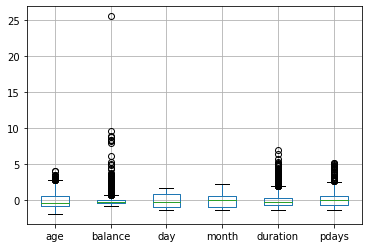

In [16]:
# see which feature contains extreme values from boxplot
df.boxplot(column=['age', 'balance', 'day', 'month', 'duration', 'pdays'])
plt.show()

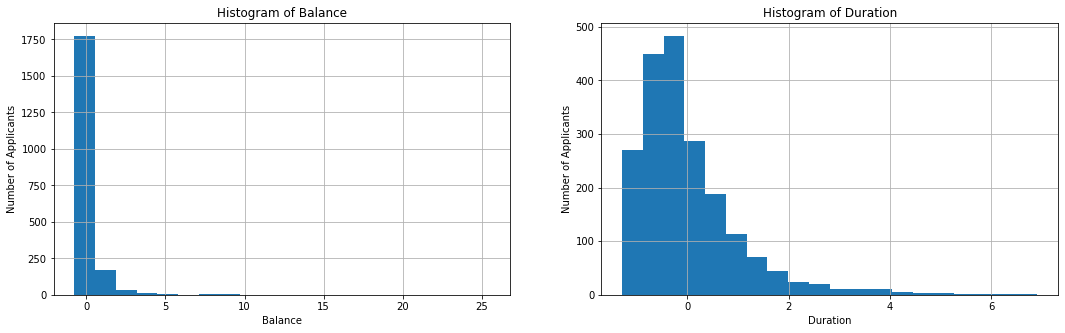

In [17]:
# Create figure with 3 subplots
fig = plt.figure(figsize=(18,5))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

# Plot Duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of Duration")
ax2.set_xlabel('Duration')
ax2.set_ylabel('Number of Applicants')
df['duration'].hist(bins=20)


plt.show()

In [18]:
# find min value
df[['balance', 'duration']].min()

balance    -0.764641
duration   -1.286763
dtype: float64

In [19]:
df['balance'] = np.log(df['balance']+1.76)
df['duration'] = np.log(df['duration']+2.29)

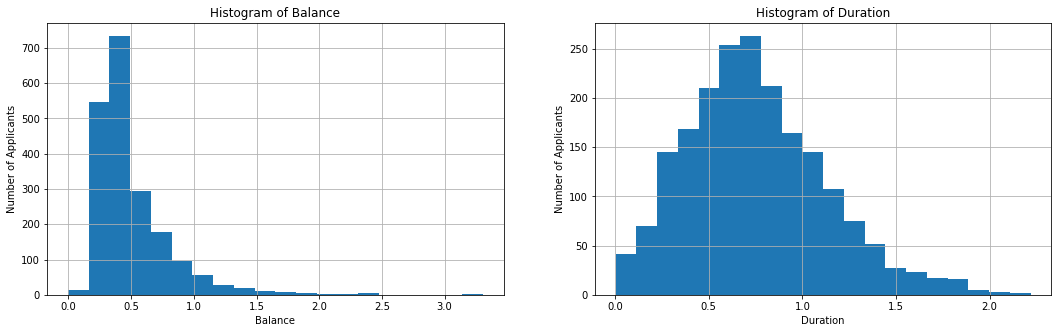

In [20]:
# Create figure with 3 subplots
fig = plt.figure(figsize=(18,5))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

# Plot Duration
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram of Duration")
ax2.set_xlabel('Duration')
ax2.set_ylabel('Number of Applicants')
df['duration'].hist(bins=20)

plt.show()

## Creation of Derived Features

In [24]:
# duration in minutes
df['duration_minutes'] = round(df_original['duration'] / 60, 1)
df.head()

age   balance       day     month  duration  campaign     pdays  \
0 -0.767253  0.360214 -1.323565 -0.325571  1.666223         2 -0.280107   
1 -0.216351  0.424085 -1.323565 -0.325571  0.704850         2 -0.264923   
2  1.357657  0.494110 -1.323565 -0.325571  0.432093         2  0.539807   
3  0.413252  0.361550 -1.323565 -0.325571  0.792379         1  0.532215   
4  0.964155  0.488050 -1.323565 -0.325571  1.142356         1  1.056049   

   previous  job_admin.  job_blue-collar  ...  housing_yes  loan_no  loan_yes  \
0         2           0                0  ...            1        1         0   
1         1           0                0  ...            1        0         1   
2         1           0                0  ...            1        0         1   
3         2           0                1  ...            1        0         1   
4         1           0                0  ...            1        1         0   

   subscribed_no  subscribed_yes  month_sin  month_cos   day_sin  day_cos  \
0              1               0   0.866025       -0.5  0.201299  0.97953   
1              1               0   0.866025       -0.5  0.201299  0.97953   
2              1               0   0.866025       -0.5  0.201299  0.97953   
3              1               0   0.866025       -0.5  0.201299  0.97953   
4              1               0   0.866025       -0.5  0.201299  0.97953   

   duration_minutes  
0              16.0  
1               3.9  
2               2.1  
3               4.6  
4               8.0  

[5 rows x 45 columns]